In [54]:
import textacy
import pandas as pd
en_nlp = textacy.load_spacy_lang('en_core_web_sm')
from tqdm import tqdm_notebook
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

ModuleNotFoundError: No module named 'nltk'

In [4]:
df_tweet = pd.read_csv('trumptweetsclean1.csv')
df= pd.read_csv('alldata.csv')

In [5]:
df.drop(columns = 'Unnamed: 0', axis =0, inplace = True)

In [6]:
df_tweet.drop(columns = 'Unnamed: 0', axis =0, inplace = True)

In [7]:
df.head(2)

,source,tweet,created_at,retweet_count,favourite_count,is_retweet,id_str,date,time,day,year,weekday,weekday_txt,my_clean,clean
0,Twitter for iPhone,The Great State of North Carolina has EARLY VO...,2019-08-30 21:39:54,19127,60738,False,1167552549974675458,2019-08-30 00:00:00,1900-01-01 21:39:54,30,2019,4,Friday,The Great State North EARLY VOTING for very im...,The Great State North Carolina has EARLY VOTIN...
1,Twitter for iPhone,https://t.co/ufd7tsGyAx,2019-08-30 20:00:31,9987,39490,False,1167527540518522883,2019-08-30 00:00:00,1900-01-01 20:00:31,30,2019,4,Friday,NaN,


In [8]:
df_tweet.head(2)

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0
1,9987,39490,4,Friday,NaN,NaN,0


In [9]:
df_tweet['join_col']

0       The Great State North EARLY VOTING for very im...
1                                                     NaN
2        This should NEVER happen another President again
3                                    FROM SCATHING REPORT
4       One the most disgraceful abuse power governmen...
                              ...                        
8220    I have always had good relationship with Chuck...
8221    General Mad Dog who being considered for Secre...
8222    I watched Night Live last night totally show n...
8223    Numerous will coming today I continue fill out...
8224    The cast and which I hear highly should immedi...
Name: join_col, Length: 8225, dtype: object

In [10]:
parsed = en_nlp(df_tweet['join_col'][4])

In [11]:
parsed

One the most disgraceful abuse power government you read this systematic effort after Candidate Trump President and President could virtually call this coup

In [12]:
df_tweet['join_col'][1]

nan

In [13]:
df_tweet.isnull().sum()

retweet_count        0
favourite_count      0
weekday              0
weekday_txt          0
tokenized          255
join_col           256
level                0
dtype: int64

In [14]:
df_tweet.dropna(inplace = True)

In [15]:
df_tweet.isnull().sum()

retweet_count      0
favourite_count    0
weekday            0
weekday_txt        0
tokenized          0
join_col           0
level              0
dtype: int64

In [16]:
df_tweet.shape

(7969, 7)

In [17]:
parsed_quotes = []
for parsed in tqdm_notebook(en_nlp.pipe(df_tweet['join_col'])):
    assert parsed.is_parsed
    parsed_quotes.append(str(parsed))

In [18]:
df_tweet['join_col'].map(lambda x: len(x.split())).shape

(7969,)

In [19]:
[len(t.split()) for t in df_tweet['join_col']]

[30,
 7,
 3,
 23,
 2,
 26,
 34,
 32,
 14,
 28,
 35,
 29,
 2,
 36,
 4,
 19,
 40,
 17,
 31,
 33,
 29,
 20,
 33,
 36,
 37,
 23,
 8,
 35,
 11,
 28,
 8,
 33,
 29,
 25,
 33,
 30,
 34,
 37,
 30,
 21,
 19,
 26,
 19,
 31,
 22,
 15,
 33,
 19,
 18,
 33,
 1,
 21,
 19,
 28,
 31,
 34,
 31,
 32,
 3,
 2,
 2,
 9,
 10,
 27,
 21,
 7,
 7,
 2,
 35,
 5,
 26,
 8,
 26,
 2,
 3,
 4,
 3,
 3,
 2,
 31,
 19,
 4,
 9,
 5,
 2,
 9,
 23,
 33,
 36,
 8,
 4,
 33,
 6,
 33,
 27,
 33,
 17,
 40,
 17,
 41,
 33,
 23,
 9,
 18,
 1,
 4,
 7,
 3,
 2,
 5,
 26,
 31,
 25,
 22,
 27,
 32,
 16,
 27,
 33,
 27,
 31,
 36,
 8,
 8,
 36,
 7,
 6,
 40,
 38,
 8,
 2,
 27,
 3,
 32,
 20,
 19,
 23,
 16,
 38,
 28,
 2,
 31,
 2,
 28,
 28,
 34,
 23,
 4,
 24,
 28,
 14,
 28,
 4,
 29,
 39,
 28,
 34,
 8,
 8,
 27,
 15,
 31,
 31,
 10,
 29,
 25,
 4,
 36,
 12,
 2,
 10,
 8,
 9,
 3,
 12,
 13,
 2,
 4,
 8,
 4,
 4,
 24,
 25,
 2,
 20,
 24,
 35,
 34,
 23,
 30,
 41,
 35,
 41,
 31,
 37,
 5,
 33,
 33,
 23,
 8,
 3,
 3,
 15,
 29,
 34,
 5,
 2,
 6,
 14,
 19,
 27,
 14,
 29,
 12,

In [24]:
df_tweet['tweet_length'] = [len(t.split()) for t in df_tweet['join_col']]

In [25]:
en_nlp = textacy.load_spacy_lang('en_core_web_sm')

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
vader = SentimentIntensityAnalyzer()

In [28]:
analyzer = SentimentIntensityAnalyzer()
for sentence in df_tweet.join_col.values[0:2]:
    vs = analyzer.polarity_scores(sentence)
    print(sentence)
    print(vs)

The Great State North EARLY VOTING for very important Congressional Ninth race Please vote early now Election Day for Dan Bishop great guy His opponent Open Sanctuary weak Crime Military
{'neg': 0.149, 'neu': 0.558, 'pos': 0.293, 'compound': 0.7346}
This should NEVER happen another President again
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [29]:
vader_scores = df_tweet['join_col'].map(analyzer.polarity_scores)

In [30]:
vader_scores[0]

{'neg': 0.149, 'neu': 0.558, 'pos': 0.293, 'compound': 0.7346}

In [31]:
dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

<7969x4 sparse matrix of type '<class 'numpy.float64'>'
	with 31876 stored elements in Compressed Sparse Row format>

In [32]:
dvec.feature_names_

['compound', 'neg', 'neu', 'pos']

In [33]:
for i, col in enumerate(dvec.feature_names_):
    df_tweet['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

In [34]:
df_tweet.head()

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level,tweet_length,vader_compound,vader_neg,vader_neu,vader_pos
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0,30,0.7346,0.149,0.558,0.293
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again,0,7,0.0000,0.000,1.000,0.000
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT,0,3,0.0000,0.000,1.000,0.000
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...,0,23,-0.6682,0.169,0.831,0.000
5,9518,34458,4,Friday,thank true,Thanks TRUE,0,2,0.7531,0.000,0.000,1.000


In [35]:
df_tweet.vader_compound.describe()

count    7969.000000
mean        0.199695
std         0.574611
min        -0.979600
25%        -0.269000
50%         0.340000
75%         0.709700
max         0.986800
Name: vader_compound, dtype: float64

In [36]:
df_tweet

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level,tweet_length,vader_compound,vader_neg,vader_neu,vader_pos
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0,30,0.7346,0.149,0.558,0.293
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again,0,7,0.0000,0.000,1.000,0.000
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT,0,3,0.0000,0.000,1.000,0.000
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...,0,23,-0.6682,0.169,0.831,0.000
5,9518,34458,4,Friday,thank true,Thanks TRUE,0,2,0.7531,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
8220,11470,55775,6,Sunday,I have alway had good relationship with chuck ...,I have always had good relationship with Chuck...,0,19,0.7964,0.000,0.633,0.367
8221,21731,82723,6,Sunday,gener mad dog who be consid for secretari defe...,General Mad Dog who being considered for Secre...,1,16,0.6068,0.143,0.492,0.365
8222,16047,69172,6,Sunday,I watch night live last night It total show no...,I watched Night Live last night totally show n...,0,14,-0.3959,0.182,0.818,0.000
8223,13996,68274,6,Sunday,numer will come today I continu fill out the v...,Numerous will coming today I continue fill out...,0,14,0.7034,0.000,0.713,0.287


In [37]:
df_tweet[df_tweet.vader_neg > 0.5][['join_col', 'favourite_count']]

,join_col,favourite_count
78,A disgrace,45751
107,Such sad and pathetic fall for and Jeff Z,61213
176,Just another former employee who got fired for...,53182
181,The Fake and Corrupt Media bad for our Country...,48771
255,Sad,51583
...,...,...
7971,FAKE NEWS A TOTAL POLITICAL WITCH HUNT,93960
8022,media coverage Its very dishonest More dishone...,42047
8187,Pathetic you have sufficient evidence that Tru...,32567
8192,Serious voter fraud New and why the media this...,101706


In [38]:
scaler = StandardScaler()

In [39]:
X = df_tweet[['vader_neg','vader_pos','vader_neu','vader_compound','tweet_length']].astype(float)
y = df_tweet.favourite_count

Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size = 0.2, random_state = 1)

lr = LinearRegression()
lr.fit(Xs, y)

scores = cross_val_score(lr, Xs, y, cv=10)
print(scores)
print(np.mean(scores))

# We do slightly better. I've also left out the part of speech stuff so that has an impact too.

[ 0.01729576 -0.05411669 -0.12406501 -0.04282032  0.02366205  0.03785924
 -0.00040679  0.030667    0.0453877   0.0375632 ]
-0.002897385253361295


In [40]:
lasso_cv = LassoCV(alphas = np.logspace(4,20,100), cv = 5)
lasso_cv.fit(X_train, np.ravel(y_train))
print(lasso_cv.alpha_)

1e+20


In [41]:
lasso =Lasso(alpha = 19, max_iter = 10000)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.04236113130277075

In [42]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=5,random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [43]:
print("Train score: ", regressor.score(X_train, y_train))
print("Train CV score: ", cross_val_score(regressor, X_train, y_train, cv=5).mean())
print("Test score: ", regressor.score(X_test, y_test))

Train score:  0.08305761221733743
Train CV score:  -0.01466081861627493
Test score:  0.020860458750894262


In [44]:
nnet = MLPRegressor(hidden_layer_sizes=1, solver='lbfgs',
                    activation='identity', max_iter=1000, random_state=1)
nnet.fit(X_train, y_train)
metrics.mean_squared_error(y_test, nnet.predict(X_test))

1998167617.6989796

In [45]:
nnet.score(X_test, y_test)

0.04239254517125568

In [46]:
base_estimator = DecisionTreeRegressor(max_depth=2)
model = AdaBoostRegressor(base_estimator=base_estimator,
                          n_estimators=100,
                          random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

-0.7363542078612197
-0.9424565841166425
-0.7026404721523333


['base_estimator__criterion',
 'base_estimator__max_depth',
 'base_estimator__max_features',
 'base_estimator__max_leaf_nodes',
 'base_estimator__min_impurity_decrease',
 'base_estimator__min_impurity_split',
 'base_estimator__min_samples_leaf',
 'base_estimator__min_samples_split',
 'base_estimator__min_weight_fraction_leaf',
 'base_estimator__presort',
 'base_estimator__random_state',
 'base_estimator__splitter',
 'base_estimator',
 'learning_rate',
 'loss',
 'n_estimators',
 'random_state']

In [48]:
df_tweet['level'] = np.where(df_tweet['favourite_count'] < df_tweet.favourite_count.median(), 0, 1)

In [49]:
df_tweet.head()

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level,tweet_length,vader_compound,vader_neg,vader_neu,vader_pos
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0,30,0.7346,0.149,0.558,0.293
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again,0,7,0.0000,0.000,1.000,0.000
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT,0,3,0.0000,0.000,1.000,0.000
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...,0,23,-0.6682,0.169,0.831,0.000
5,9518,34458,4,Friday,thank true,Thanks TRUE,0,2,0.7531,0.000,0.000,1.000


In [50]:
Xl = df_tweet[['vader_neg','vader_pos','vader_neu','vader_compound','tweet_length']].astype(float)
yl = df_tweet.level

In [51]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size = 0.2, random_state = 1, stratify = yl)

In [56]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(solver='liblinear', multi_class='ovr')

In [59]:
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)
gs = GridSearchCV(estimator = model, param_grid = params, cv = 5)

In [60]:
gs.fit(Xl_train, yl_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 5.17947e-05, 2.68270e-04, 1.38950e-03, 7.19686e-03,
       3.72759e-02, 1.93070e-01, 1.00000e+00, 5.17947e+00, 2.68270e+01,
       1.38950e+02, 7.19686e+02, 3.72759e+03, 1.93070e+04, 1.00000e+05]), 'penalty': ['l1', 'l2'], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
gs_best = gs.best_estimator_
gs_best

LogisticRegression(C=0.19306977288832497, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [62]:
print(gs.best_score_)

0.6144313725490196


In [63]:
cross_val_score(gs.best_estimator_, Xl_train, yl_train, cv=5).mean()

0.6144309354318047

In [64]:
gs.score(Xl_train, yl_train)

0.6147450980392157

In [65]:
gs.score(Xl_test, yl_test)

0.6010037641154329

In [66]:
print(gs.best_params_)

{'C': 0.19306977288832497, 'fit_intercept': False, 'penalty': 'l1'}


In [67]:
print(gs.best_params_)

{'C': 0.19306977288832497, 'fit_intercept': False, 'penalty': 'l1'}


In [68]:
results = pd.DataFrame(gs.cv_results_)
results

//anaconda3/envs/textacy/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/envs/textacy/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/envs/textacy/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/envs/textacy/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010949,0.013186,0.002065,0.001993,1e-05,True,l1,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.500000,0.500000,...,0.499922,0.000157,56,0.499902,0.499902,0.500000,0.499902,0.499902,0.499922,0.000039
1,0.006503,0.003925,0.001026,0.000093,1e-05,True,l2,"{'C': 1e-05, 'fit_intercept': True, 'penalty':...",0.500000,0.500000,...,0.500078,0.000157,50,0.500098,0.500098,0.500000,0.500098,0.500098,0.500078,0.000039
2,0.003806,0.000340,0.000943,0.000035,1e-05,False,l1,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.500000,0.500000,...,0.499922,0.000157,56,0.499902,0.499902,0.500000,0.499902,0.499902,0.499922,0.000039
3,0.004810,0.000183,0.000959,0.000058,1e-05,False,l2,"{'C': 1e-05, 'fit_intercept': False, 'penalty'...",0.500000,0.500000,...,0.500078,0.000157,50,0.500098,0.500098,0.500000,0.500098,0.500098,0.500078,0.000039
4,0.004478,0.000912,0.001072,0.000136,5.17947e-05,True,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.500000,0.500000,...,0.499922,0.000157,56,0.499902,0.499902,0.500000,0.499902,0.499902,0.499922,0.000039
5,0.005032,0.000123,0.000949,0.000044,5.17947e-05,True,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.514890,0.512539,...,0.510745,0.003465,49,0.509512,0.510688,0.512157,0.511076,0.510684,0.510823,0.000849
6,0.003616,0.000079,0.000919,0.000011,5.17947e-05,False,l1,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.500000,0.500000,...,0.499922,0.000157,56,0.499902,0.499902,0.500000,0.499902,0.499902,0.499922,0.000039
7,0.006516,0.002504,0.001043,0.000133,5.17947e-05,False,l2,"{'C': 5.1794746792312125e-05, 'fit_intercept':...",0.500000,0.500000,...,0.499922,0.000157,56,0.499706,0.499902,0.499804,0.499706,0.499706,0.499765,0.000078
8,0.004808,0.000839,0.000982,0.000062,0.00026827,True,l1,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.500000,0.500000,...,0.500078,0.000157,50,0.500098,0.500098,0.500000,0.500098,0.500098,0.500078,0.000039
9,0.006928,0.001100,0.001377,0.000259,0.00026827,True,l2,"{'C': 0.0002682695795279727, 'fit_intercept': ...",0.547806,0.565047,...,0.558745,0.009269,47,0.560894,0.556972,0.555098,0.560478,0.556558,0.558000,0.002284


In [72]:
gs.predict(Xl_test)

array([1, 0, 0, ..., 0, 0, 0])

In [73]:
gs.predict(Xl_train)

array([1, 0, 0, ..., 0, 1, 0])

In [74]:
gs.predict(Xl)

array([1, 0, 0, ..., 0, 0, 1])

In [75]:
df_tweet['predicted_level'] = gs.predict(Xl)

In [80]:
df_tweet[['vader_neg', 'predicted_level']]

,vader_neg,predicted_level
0,0.149,1
2,0.000,0
3,0.000,0
4,0.169,1
5,0.000,0
...,...,...
8220,0.000,0
8221,0.143,0
8222,0.182,0
8223,0.000,0


In [108]:
df_tweet['neg'] = np.where(df_tweet['vader_neg'] > 0.3, 1, 0)

In [109]:
df_tweet[['neg', 'predicted_level']]

,neg,predicted_level
0,0,1
2,0,0
3,0,0
4,0,1
5,0,0
...,...,...
8220,0,0
8221,0,0
8222,0,0
8223,0,0


In [110]:
df_tweet.groupby('neg')['predicted_level'].count()

neg
0    7216
1     753
Name: predicted_level, dtype: int64

In [ ]:
df_tweet.groupby(predicted_level)

In [ ]:
df_tweet.groupby(predicted_level)

In [111]:
df_tweet['pos'] = np.where(df_tweet['vader_pos'] > 0.3, 1, 0)

In [112]:
df_tweet.groupby('pos')['predicted_level'].count()

pos
0    5512
1    2457
Name: predicted_level, dtype: int64

In [77]:
df_tweet

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,level,tweet_length,vader_compound,vader_neg,vader_neu,vader_pos,predicted_level
0,19127,60738,4,Friday,the great state north earli vote for veri impo...,The Great State North EARLY VOTING for very im...,0,30,0.7346,0.149,0.558,0.293,1
2,18446,64046,4,Friday,thi should never happen anoth presid again,This should NEVER happen another President again,0,7,0.0000,0.000,1.000,0.000,0
3,10543,35113,4,Friday,from scath report,FROM SCATHING REPORT,0,3,0.0000,0.000,1.000,0.000,0
4,17935,53636,4,Friday,one the most disgrac an abus power govern you ...,One the most disgraceful abuse power governmen...,0,23,-0.6682,0.169,0.831,0.000,1
5,9518,34458,4,Friday,thank true,Thanks TRUE,0,2,0.7531,0.000,0.000,1.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,11470,55775,6,Sunday,I have alway had good relationship with chuck ...,I have always had good relationship with Chuck...,0,19,0.7964,0.000,0.633,0.367,0
8221,21731,82723,6,Sunday,gener mad dog who be consid for secretari defe...,General Mad Dog who being considered for Secre...,0,16,0.6068,0.143,0.492,0.365,0
8222,16047,69172,6,Sunday,I watch night live last night It total show no...,I watched Night Live last night totally show n...,0,14,-0.3959,0.182,0.818,0.000,0
8223,13996,68274,6,Sunday,numer will come today I continu fill out the v...,Numerous will coming today I continue fill out...,0,14,0.7034,0.000,0.713,0.287,0


In [36]:
X_train

array([[-0.79081502, -1.1152946 ,  1.73368306, -0.347552  , -1.57379208],
       [ 1.25676512,  0.14953662, -1.04058196, -0.5262928 , -0.42291849],
       [-0.79081502, -0.05636614,  0.61150844,  0.59627598,  0.44023671],
       ...,
       [-0.79081502,  0.50741522,  0.01405437,  1.29940434,  2.1665471 ],
       [-0.79081502,  0.527025  , -0.00672664,  1.26633642,  1.11157964],
       [-0.79081502,  0.57114702, -0.05348392,  1.23935996,  0.82386124]])

In [37]:
my_df  = df_tweet.copy()

Put sentiments for each tweet and the predictor values 

In [38]:
my_df.pop('join_col')

0       The Great State North EARLY VOTING for very im...
2        This should NEVER happen another President again
3                                    FROM SCATHING REPORT
4       One the most disgraceful abuse power governmen...
5                                             Thanks TRUE
                              ...                        
8220    I have always had good relationship with Chuck...
8221    General Mad Dog who being considered for Secre...
8222    I watched Night Live last night totally show n...
8223    Numerous will coming today I continue fill out...
8224    The cast and which I hear highly should immedi...
Name: join_col, Length: 7969, dtype: object

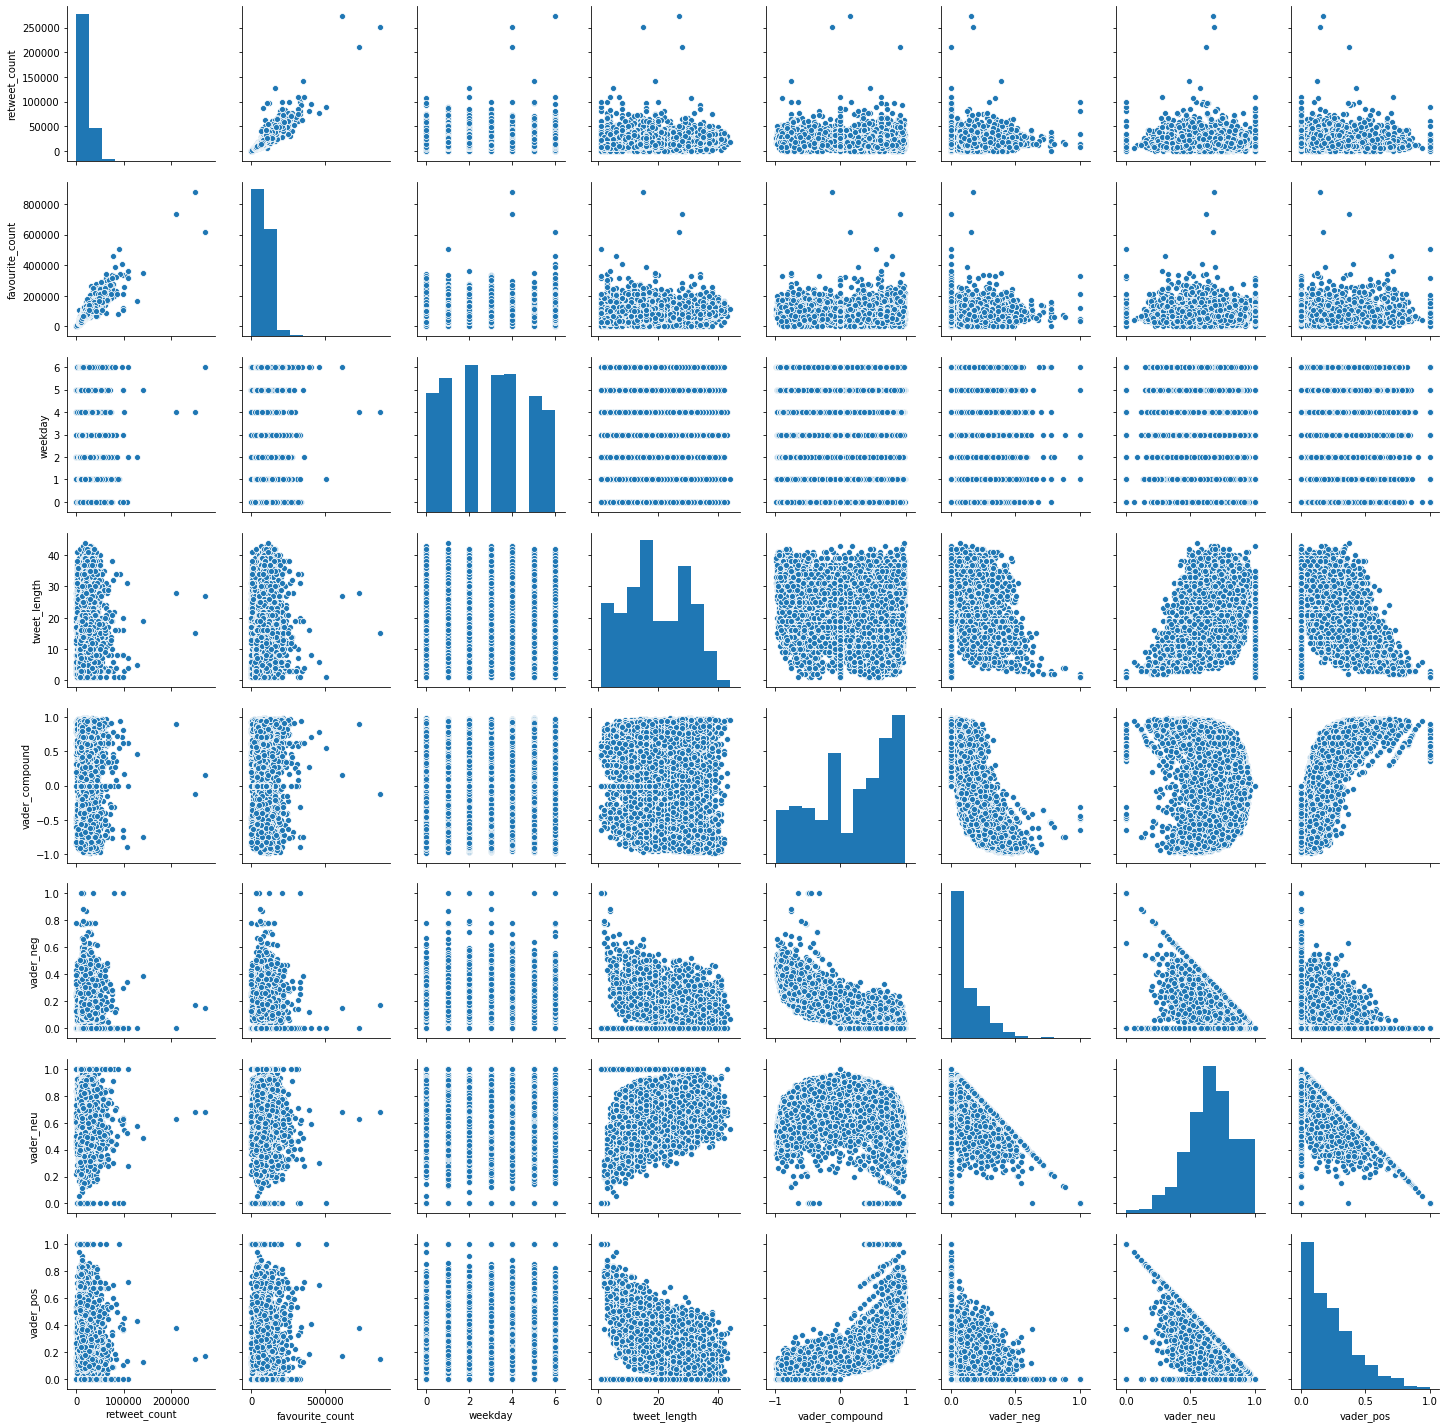

In [39]:
sns.pairplot(my_df);

In [40]:
df_tweet['loglikes'] = np.log1p(df_tweet.favourite_count)

In [41]:
df_tweet.corr()['favourite_count']

retweet_count      0.917553
favourite_count    1.000000
weekday            0.066870
tweet_length       0.175042
vader_compound    -0.076516
vader_neg          0.115893
vader_neu         -0.021413
vader_pos         -0.056068
loglikes           0.726356
Name: favourite_count, dtype: float64

In [42]:
df_tweet.corr()['loglikes']

retweet_count      0.644533
favourite_count    0.726356
weekday            0.034813
tweet_length       0.153594
vader_compound    -0.056095
vader_neg          0.079503
vader_neu          0.011889
vader_pos         -0.063560
loglikes           1.000000
Name: loglikes, dtype: float64

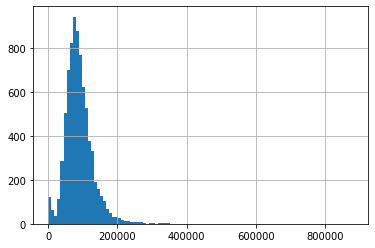

In [43]:
df_tweet.favourite_count.hist(bins = 100);

In [44]:
df_tweet[df_tweet.favourite_count <10]

,retweet_count,favourite_count,weekday,weekday_txt,tokenized,join_col,tweet_length,vader_compound,vader_neg,vader_neu,vader_pos,loglikes
427,3,3,2,Wednesday,I have direct the secretari the navi spencer a...,I have directed the Secretary the Navy Spencer...,23,0.6115,0.000,0.834,0.166,1.386294
1867,3,1,5,Saturday,final great news the border,Finally great news the Border,5,0.6249,0.000,0.494,0.506,0.693147
3810,6,7,0,Monday,the white hous run beauti We are make some the...,The White House running beautifully are making...,20,0.8341,0.000,0.657,0.343,2.079442
7674,11,4,4,Friday,I demand second investig after for her close r...,I demand second investigation after for her cl...,12,-0.5994,0.353,0.647,0.000,1.609438
7797,2,2,1,Tuesday,I dont know have russia and the are go crazi y...,I dont know have Russia and the are going craz...,17,-0.8176,0.395,0.605,0.000,1.098612
7872,9,9,3,Thursday,spoke the congression retreat PA thi afternoon Th,Spoke the Congressional Retreat this afternoon,6,0.2023,0.000,0.735,0.265,2.302585


In [45]:
df_tweet.shape

(7969, 12)

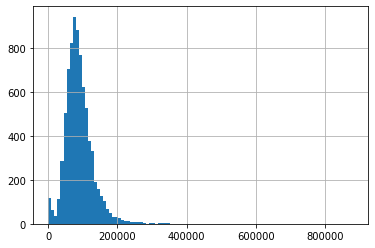

In [46]:
df_tweet[df_tweet.favourite_count >10].favourite_count.hist(bins=100);

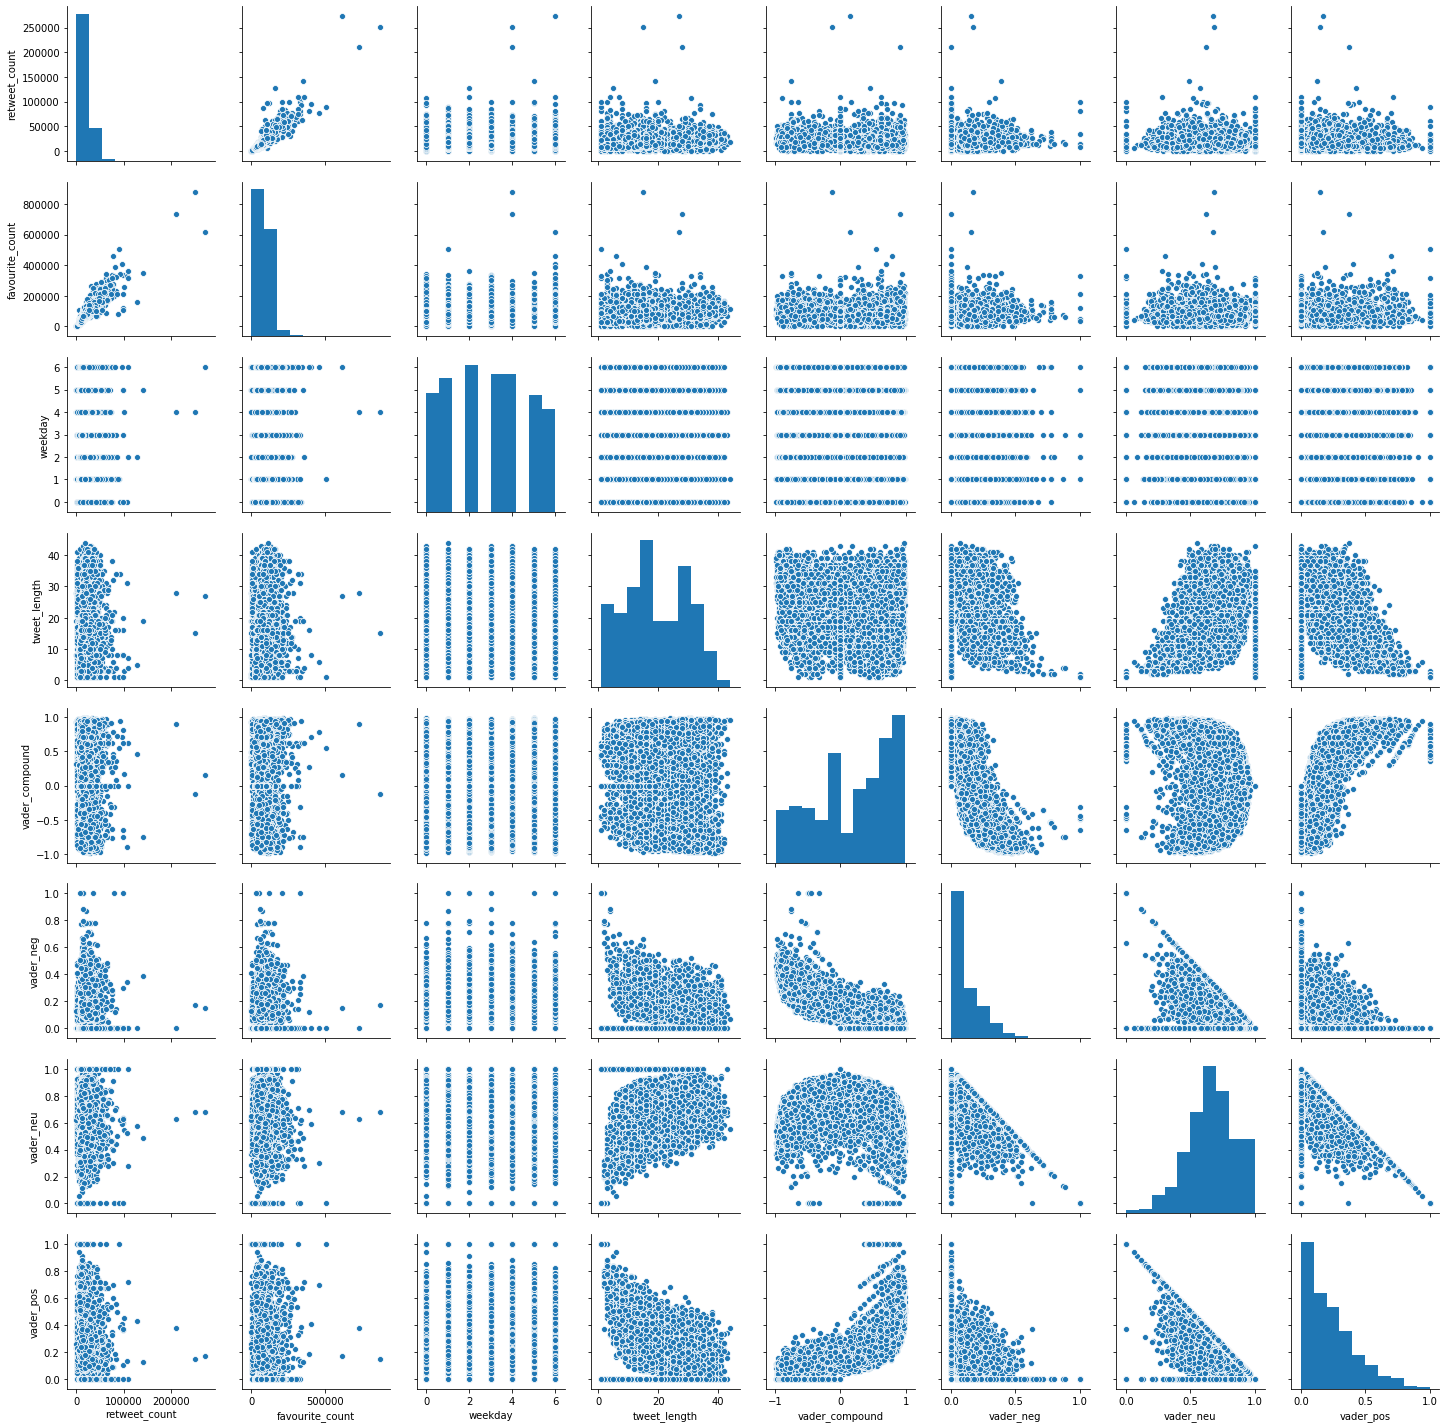

In [47]:
sns.pairplot(my_df[my_df.favourite_count > 100]);

In [48]:
for tweet in df_tweet.sort_values('vader_neg', ascending=False)['join_col'][0:10]:
    print(tweet)
    print('============================================================\n')

dead

Sad

terrible

A disgrace

TREASON

BORING

Warning Stopped Chemical Attack

A Catastrophic Media Failure

Death Spiral

PRESIDENTIAL HARASSMENT



In [49]:
for tweet in df_tweet.sort_values('vader_pos', ascending=False)['join_col'][0:10]:
    print(tweet)
    print('============================================================\n')

Interesting

Thanks

Amazing

Cute

I agree

Happy

Thanks

Great

true thanks

Great



In [50]:
for tweet in df_tweet.sort_values('vader_compound', ascending=False)['join_col'][0:10]:
    print(tweet)
    print('============================================================\n')

Reed his great and courageous win When had his amazing win ago people saw his great talent and bright future ahead Now the Champion

money spent protecting other and get nothing but Trade and time that these very rich either pay the United for its great military protection protect Trade must made FREE and FAIR

I Camp working many have great Economy have been very helpful both with respect the huge coming helping make good Trade The Dow heading BEST June Stock Market BEST June

President Bush led long successful and beautiful life Whenever I was with him I saw his absolute joy for life and true pride his family His were great from beginning end was truly wonderful man and will all

Thank you Justice for that warm introduction Tonight was great honor attend the Greenbrier Classic Salute Service Dinner West God Bless our God Bless and HAPPY INDEPENDENCE DAY ALL

Hurricane raging but have great talented and brave people already place and ready help careful safe

truly great football team 

In [84]:
df_tweet[df_tweet.vader_neg>0.5]['join_col'].sort_values(ascending = False)

5751               year low illegal immigration this year
7665    voluntarily leaving the Apprentice was fired h...
366     used currency manipulation steal our and hurt ...
6156    terrorist was happy flag his hospital room peo...
273                                              terrible
                              ...                        
2085                                        A total loser
78                                             A disgrace
5147                                A complete Witch Hunt
5253                                   A TOTAL WITCH HUNT
2036                         A Catastrophic Media Failure
Name: join_col, Length: 99, dtype: object